# Данилов Фёдор, 151004

# Лабораторная работа №1

In [19]:
# Imports
import numpy as np
import sounddevice as sd
from scipy import signal
import matplotlib.pyplot as plt

duration = 1.0  # Продолжительность сигнала в секундах
sample_rate = 44100  # Частота дискретизации (samples per second)
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

def play_signal(signal):
    sd.play(signal, sample_rate)
    sd.wait()

def plot_signal(signal, title):
    plt.figure(figsize=(10, 4))
    plt.plot(t[:1000], signal[:1000])  # Отображаем только первые 1000 отсчётов для наглядности
    plt.title(title)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()
    plt.close()

## 1. Сгенерировать звуковые сигналы

### 1.1. Синусоида

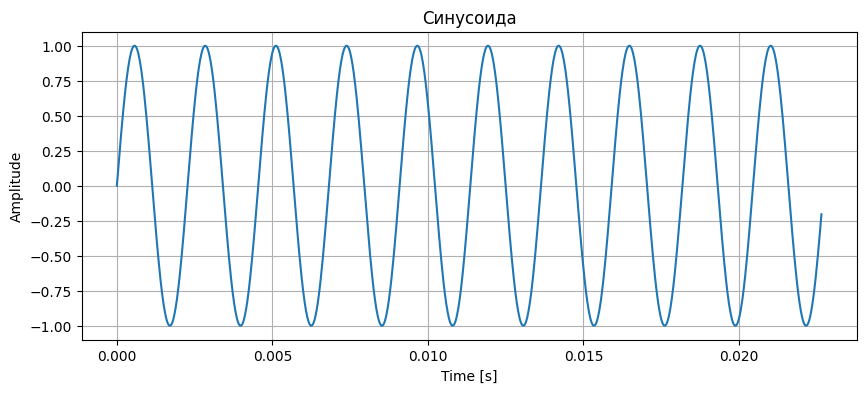

In [25]:
frequency = 440  # Частота сигнала в Гц (A4 note)
sine_wave = np.sin(2 * np.pi * frequency * t)

play_signal(sine_wave)
plot_signal(sine_wave, "Синусоида")

### 1.2. Импульс с различной скважностью

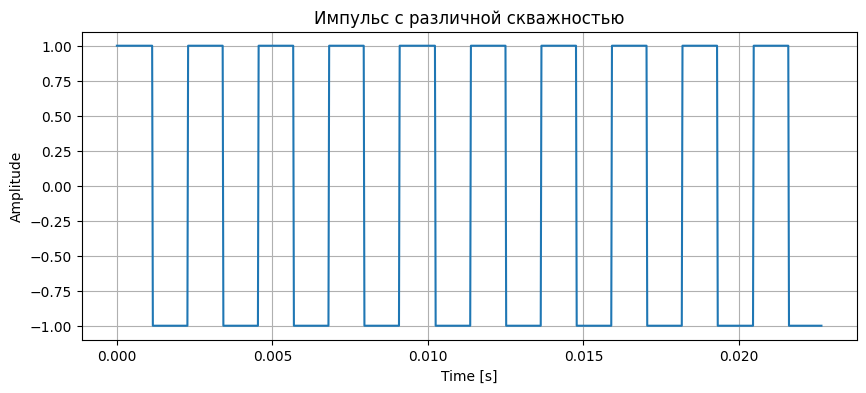

In [26]:
duty_cycle = 0.5 # 0.999546  # Скважность (длительность высокого уровня)
pulse_wave = signal.square(2 * np.pi * frequency * t, duty=duty_cycle)

play_signal(pulse_wave)
plot_signal(pulse_wave, "Импульс с различной скважностью")

### 1.3. Треугольная

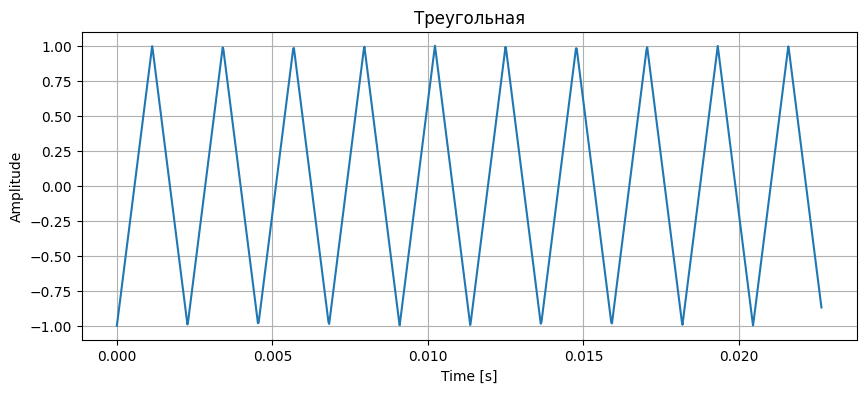

In [27]:
triangle_wave = signal.sawtooth(2 * np.pi * frequency * t, width=0.5)

play_signal(triangle_wave)
plot_signal(triangle_wave, "Треугольная")

### 1.4. Пила

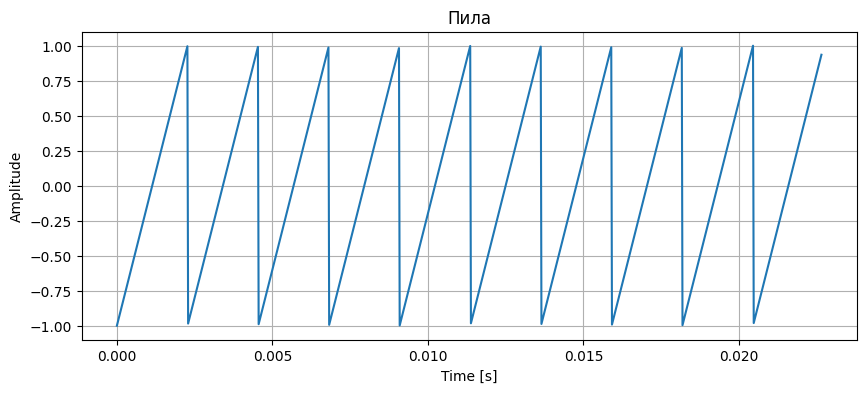

In [28]:
sawtooth_wave = signal.sawtooth(2 * np.pi * frequency * t)

play_signal(sawtooth_wave)
plot_signal(sawtooth_wave, "Пила")

### 1.5. Шум

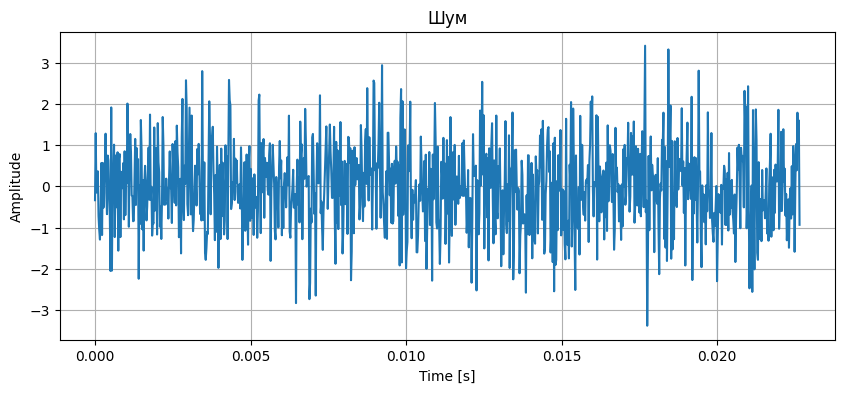

In [29]:
noise = np.random.normal(0, 1, t.shape)

play_signal(noise)
plot_signal(noise, "Шум")

## 2. Сгенерировать полифонические сигналы

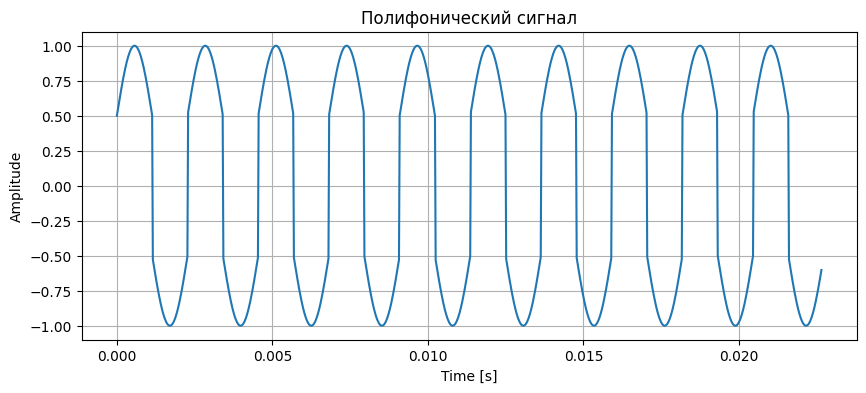

In [30]:
# Генерация монофонических сигналов
frequency1 = 440  # Частота первого сигнала в Гц (A4)
frequency2 = 523.25  # Частота второго сигнала в Гц (C5)
frequency3 = 659.25  # Частота третьего сигнала в Гц (E5)

# Синусоидальные волны для каждой частоты
sine_wave1 = np.sin(2 * np.pi * frequency1 * t)
sine_wave2 = np.sin(2 * np.pi * frequency2 * t)
sine_wave3 = np.sin(2 * np.pi * frequency3 * t)

duty_cycle = 0.5
pulse_wave = signal.square(2 * np.pi * frequency1 * t, duty=duty_cycle)
triangle_wave = signal.sawtooth(2 * np.pi * frequency3 * t, width=0.5)
noise = np.random.normal(0.4, 0.6, t.shape)

# Полифонический сигнал (сумма синусоидальных сигналов)
polyphonic_signal = sine_wave1 + pulse_wave

# Нормализация сигнала для предотвращения клиппинга
polyphonic_signal = polyphonic_signal / np.max(np.abs(polyphonic_signal))

play_signal(polyphonic_signal)
plot_signal(polyphonic_signal, "Полифонический сигнал")

## 3. Сгенерировать звуковые сигналы с модуляцией параметров

In [31]:
# Параметры несущего сигнала
carrier_frequency = 440  # Частота несущего сигнала в Гц (A4)

# Несущий сигнал (синусоидальный)
carrier_signal = np.sin(2 * np.pi * carrier_frequency * t)

# Модулирующие сигналы
modulating_frequency = 10  # Частота модуляции в Гц

### 3.1. Синосуидальный модулирующий сигнал

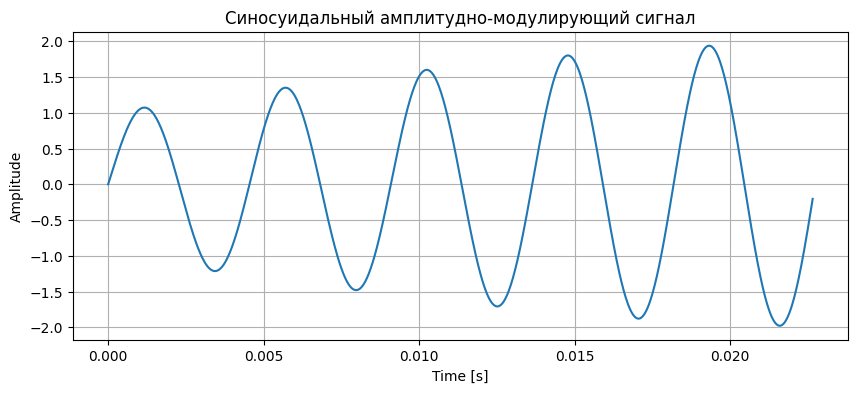

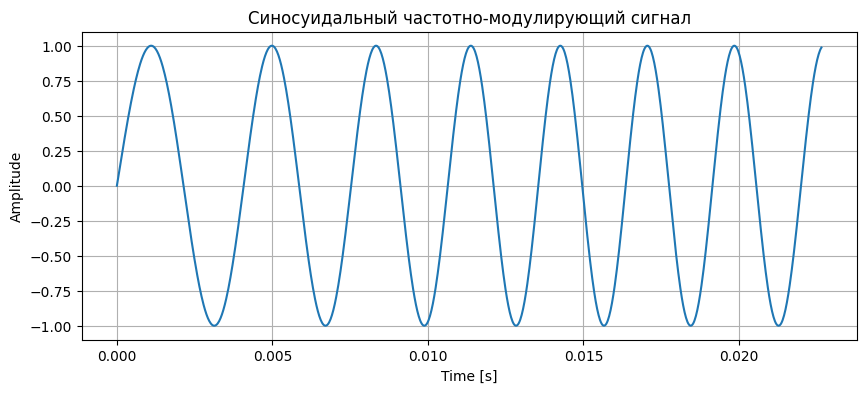

In [32]:
modulating_signal_sine = np.sin(2 * np.pi * modulating_frequency * t)
am_signal_sine = (1 + modulating_signal_sine) * carrier_signal
fm_signal_sine = np.sin(2 * np.pi * (carrier_frequency + modulating_signal_sine * 100) * t)

play_signal(am_signal_sine)
play_signal(fm_signal_sine)

plot_signal(am_signal_sine, "Синосуидальный амплитудно-модулирующий сигнал")
plot_signal(fm_signal_sine, "Синосуидальный частотно-модулирующий сигнал")

### 3.2. Импульсный модулирующий сигнал

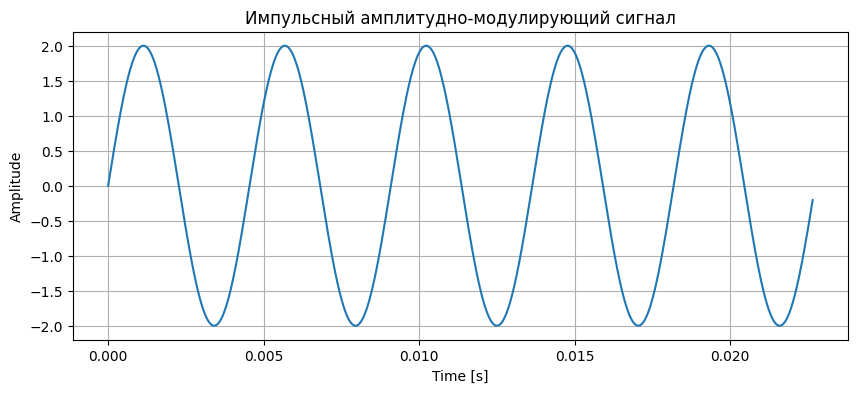

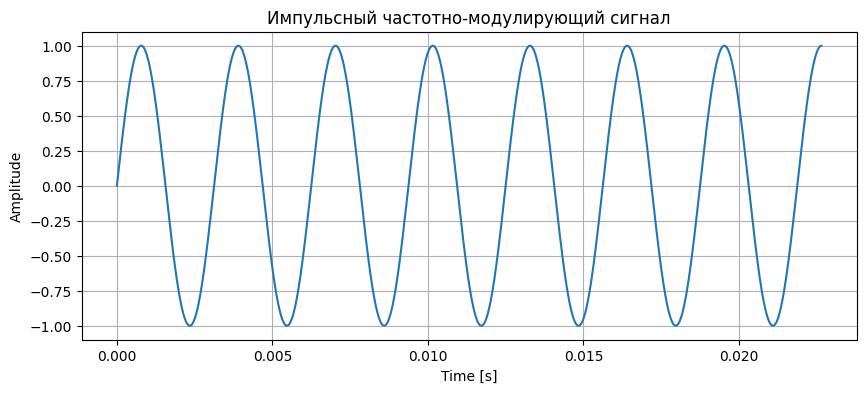

In [33]:
duty_cycle = 0.5  # Скважность импульса
modulating_signal_square = signal.square(2 * np.pi * modulating_frequency * t, duty=duty_cycle)

am_signal_square = (1 + modulating_signal_square) * carrier_signal
fm_signal_square = np.sin(2 * np.pi * (carrier_frequency + modulating_signal_square * 100) * t)

play_signal(am_signal_square)
play_signal(fm_signal_square)

plot_signal(am_signal_square, "Импульсный амплитудно-модулирующий сигнал")
plot_signal(fm_signal_square, "Импульсный частотно-модулирующий сигнал")

### 3.3. Треугольный модулирующий сигнал

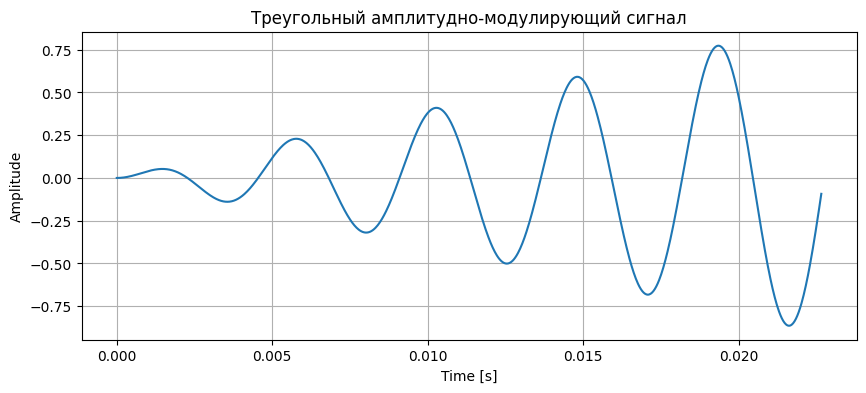

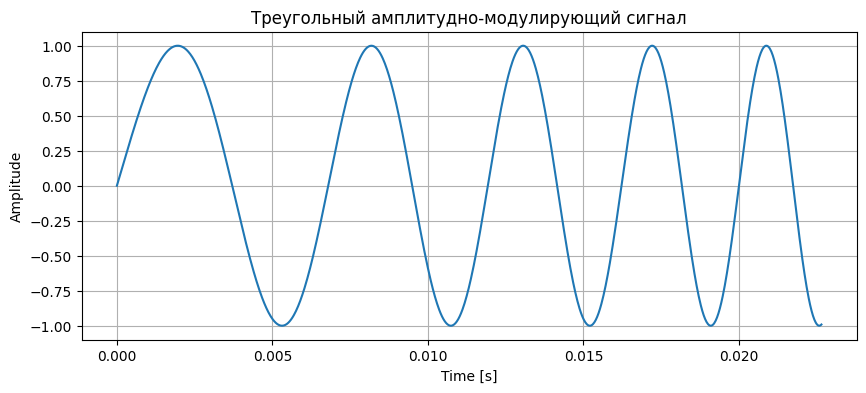

In [34]:
modulating_signal_triangle = signal.sawtooth(2 * np.pi * modulating_frequency * t, width=0.5)

am_signal_triangle = (1 + modulating_signal_triangle) * carrier_signal
fm_signal_triangle = np.sin(2 * np.pi * (carrier_frequency + modulating_signal_triangle * 100) * t)

play_signal(am_signal_triangle)
play_signal(fm_signal_triangle)

plot_signal(am_signal_triangle, "Треугольный амплитудно-модулирующий сигнал")
plot_signal(fm_signal_triangle, "Треугольный амплитудно-модулирующий сигнал")

### 3.4. Пилообразный модулирующий сигнал

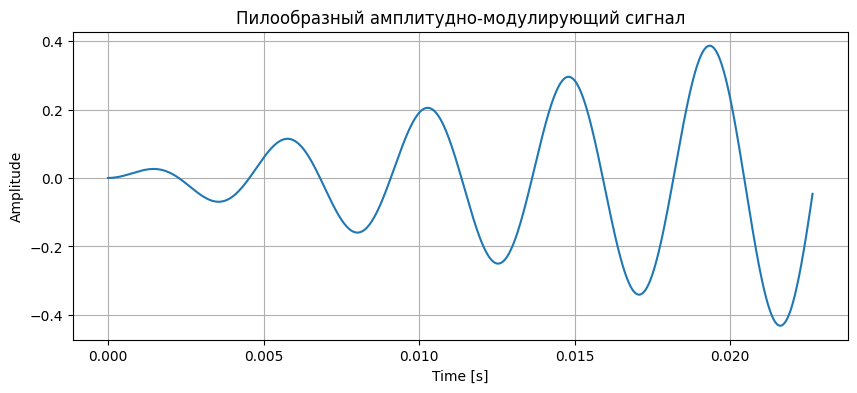

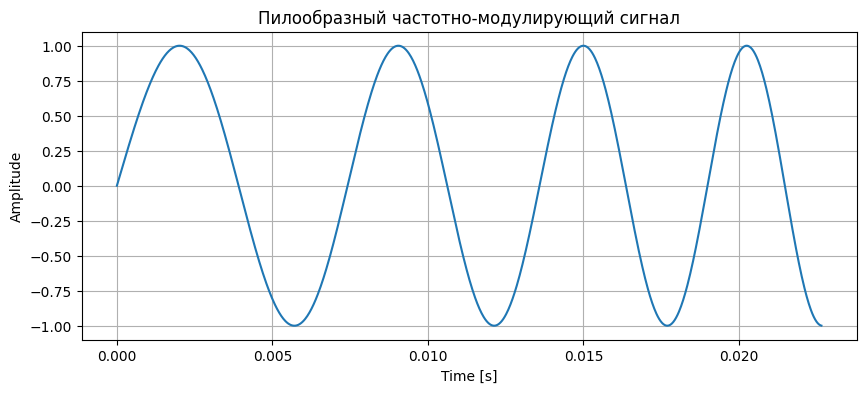

In [35]:
modulating_signal_sawtooth = signal.sawtooth(2 * np.pi * modulating_frequency * t)

am_signal_sawtooth = (1 + modulating_signal_sawtooth) * carrier_signal
fm_signal_sawtooth = np.sin(2 * np.pi * (carrier_frequency + modulating_signal_sawtooth * 100) * t)

play_signal(am_signal_sawtooth)
play_signal(fm_signal_sawtooth)

plot_signal(am_signal_sawtooth, "Пилообразный амплитудно-модулирующий сигнал")
plot_signal(fm_signal_sawtooth, "Пилообразный частотно-модулирующий сигнал")